In [12]:
from sage.all import *

var('t')

R200 = RealField(64)
maxDepth = 20

print_debug = True
def print_Si(T):
	S_iminus1 = (t/(t+1))**t * (1/(t+1))              #S_2

	print("depth 2, Prob. of adversary's failure: ",R200(S_iminus1.subs(t=T))) if print_debug else None
	for i in range(3,maxDepth+1):
		#q_tilde_i = (t/(t+1)) * (1/(1-S_iminus1))
		expr = (t/(t+1))**t * (1/(t+1)) * (1/((1-S_iminus1)**t)).subs(t=T)
		S_iminus1 = expr
		print("depth ",i,", Prob. of adversary's failure: ",R200(S_iminus1.subs(t=T))) if print_debug else None
	
	return S_iminus1.subs(t=T)

beta = []
def print_beta_i(T):
	S_iminus1 = (t/(t+1))**t * (1/(t+1))              #S_2
	betas = []
	betas.append(R200(T/(T+1)))

	if maxDepth == 1:
		return [1.0]

	betas.append(R200(1/(T+1)))

	if maxDepth == 2:
		return betas

	print("depth 2, betas: ", betas) if print_debug else None
	for i in range(3, maxDepth+1):
		q_tilde_i = (t/(t+1)) * (1/(1-S_iminus1)).subs(t=T)
		expr = (t/(t+1))**t * (1/(t+1)) * (1/((1-S_iminus1)**t)).subs(t=T)
		S_iminus1 = expr   #for the next iteration of the loop
		sum = R200(0)
		for j in range(i-1):
			betas[j] = R200(betas[j] * R200(q_tilde_i.subs(t=T)))
			sum = R200(sum + betas[j])
		expr = 1 - q_tilde_i
		added_beta = R200(expr.subs(t=T))
		betas.append(added_beta)
		sum = R200(sum + added_beta)
		print("depth ",i,", betas: ",betas) if print_debug else None

		assert sum < 1.0001 and sum > 0.9999
		#print("Sum of elements of the vector: ", sum)
		
	#print("And the final vector verically, to easily compare with SymPy: ")
	return betas
	#for j in range(len(betas)):
		#print(betas[j])

T = 1.85
beta = print_beta_i(R200(T))		

depth 2, betas:  [0.649122807017543871, 0.350877192982456129]
depth  3 , betas:  [0.500277457296850289, 0.270420247187486630, 0.229302295515663081]
depth  4 , betas:  [0.414589653531174538, 0.224102515422256496, 0.190027269598382291, 0.171280561448186675]
depth  5 , betas:  [0.357805906023306733, 0.193408597850436062, 0.164000424971222078, 0.147821335991301658, 0.136963735163733468]
depth  6 , betas:  [0.316941315714843145, 0.171319630116131422, 0.145270129959192932, 0.130938835640005586, 0.121321268590757724, 0.114208819979069191]
depth  7 , betas:  [0.285884917575890725, 0.154532387878859844, 0.131035422238823714, 0.118108420639313322, 0.109433258308540991, 0.103017743245352566, 0.0979878501132188387]
depth  8 , betas:  [0.261347860505079105, 0.141269113786529239, 0.119788856099431609, 0.107971358907118419, 0.100040772243413972, 0.0941758908428157324, 0.0895777056017094708, 0.0858284420139024527]
depth  9 , betas:  [0.241388888093330752, 0.130480480050449049, 0.110640656188772748, 0.

In [13]:
def f(x):
    T, = x
    global print_debug 
    print_debug = False
    
    beta = print_beta_i(R200(T))
    prob = 1

    # expression (10)
    for d in range(0, maxDepth):
        exponent = sum([beta[i] for i in range(d, maxDepth)]) * T
        prob *= (1 - e ** (-exponent)) ** (beta[d] * T)

    # so we can minimize (probability of adversary succeding)
    return prob
    
from scipy.optimize import minimize

bounds=[(0.0, 20.0)]
maxDepth = 20

res = minimize(f, 1.0, bounds=bounds)
print(res)

T = res.x[0]
print("optimal T for depth 20: ", T)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.24686080699360632
        x: [ 3.984e+00]
      nit: 11
      jac: [-3.830e-07]
     nfev: 24
     njev: 12
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
optimal T for depth 20:  3.983978859604314


In [14]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

plt.rcParams.update({'figure.autolayout': True})
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 14.8}

matplotlib.rc('font', **font)

vals = []
Ts = []
xs = []

for l in range(1, 40):
    maxDepth = l
    res = minimize(f, 1.0, bounds=bounds)
    T, = res.x

    Ts.append(T)
    xs.append(l)

    vals.append(f(res.x))

print([(x) for x in Ts])
print([(x) for x in vals])

import math
#print(math.log(vals[-1], vals[0]))



[np.float64(0.6931530867141702), np.float64(1.3040519265493933), np.float64(1.6872323014264226), np.float64(1.9765961605966562), np.float64(2.2122186492296865), np.float64(2.412555588520061), np.float64(2.5877330637097735), np.float64(2.743774841063348), np.float64(2.8867808900330343), np.float64(3.017223062266125), np.float64(3.13802325939023), np.float64(3.250639564293675), np.float64(3.3584175131551555), np.float64(3.459378601135633), np.float64(3.5554299890248164), np.float64(3.6471637852590453), np.float64(3.7350410306961592), np.float64(3.8194465365220753), np.float64(3.9006557751425466), np.float64(3.983978859604314), np.float64(4.061816610912523), np.float64(4.137716413223425), np.float64(4.21185720579317), np.float64(4.2843909892720475), np.float64(4.355460616726056), np.float64(4.425162288299316), np.float64(4.493527104962532), np.float64(4.560668624699336), np.float64(4.639027693973975), np.float64(4.707958271448019), np.float64(4.776667888263055), np.float64(4.8452408287914

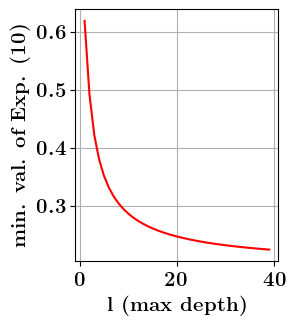

In [31]:
figsize = (3.3, 3.5*4./4.0)
plt.figure(figsize=figsize)
plt.plot(xs, vals, color='red')
plt.xlabel(r'\textbf{l (max depth)}')
plt.ylabel(r'\textbf{min. val. of Exp. (10)}')
plt.grid(True)
plt.savefig('images_analytical_betas/minimalization_with_analytical_betas.pdf', dpi=1200)
plt.show()
plt.close()

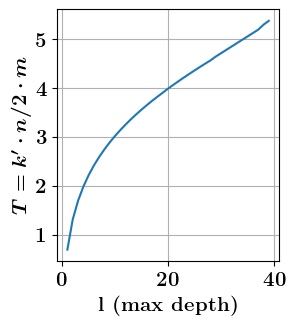

In [32]:
plt.figure(figsize=figsize)
plt.plot(xs, Ts)
plt.xlabel(r'\textbf{l (max depth)}')
plt.ylabel(r"\boldmath $T = k' \cdot n/2 \cdot m$")
plt.grid(True)
plt.savefig('images_analytical_betas/T_with_analytical_betas.pdf', dpi=1200)
plt.show()
plt.close()



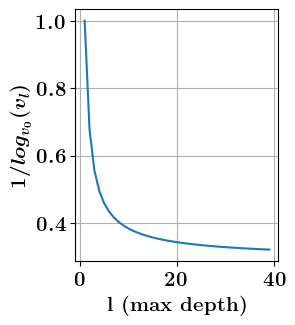

In [33]:
from math import log, e

vs = [pow(log(vals[i-1], vals[0]), -1) for i in xs]

plt.figure(figsize=figsize)
plt.plot(xs, vs)
plt.xlabel(r'\textbf{l (max depth)}')
plt.ylabel(r'\boldmath $1 / log_{v_0}(v_l)$')
plt.grid(True)
plt.savefig('images_analytical_betas/1_over_log_v0_vl_with_analytical_betas.pdf', dpi=1200)
plt.show()
plt.close()



In [34]:
from math import log, e, ceil

n = 2 ** 19

print(vs[20-1])
m = - n * (log(2 ** (-256), e)) / (log(2, e) ** 2) * vs[20 - 1] / 2
print(m, ceil(m), log(m, 2))

m = ceil(m)

0.34344305690918564
33251341.1931415 33251342 24.986909197116216


4.37726434991917e-83
-166.09640474436813


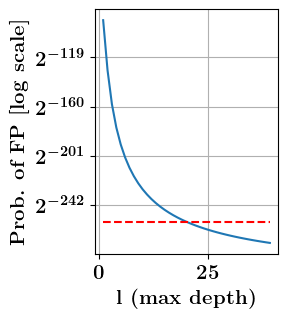

In [35]:
# equation (9)
from math import e, log

n = 2 ** 19

xs = []
ys = []
for depth in range(1, 40):
    xs.append(depth)
    prob = 1
    e2 = 1

    beta = []
    T = Ts[depth - 1]
    k = int(T * 2 * m / n)

    maxDepth = depth
    beta = print_beta_i(R200(T))

    for d in range(0, depth):
        exponent = sum([beta[i] for i in range(d, depth)]) * k * (n / 2) / m
        prob *= pow(1 - e ** (-exponent), beta[d] * k)
        e2 += e ** (-exponent)
    ys.append(prob)

print(min(ys))
plt.figure(figsize=figsize)
plt.xlabel(r'\textbf{l (max depth)}')
plt.ylabel(r'\textbf{Prob. of FP [log scale]}')
plt.grid(True)
plt.yscale('log', base=2)
plt.plot(xs, ys)
plt.plot(xs, [2** -256 for _ in xs], color='red', linestyle='dashed')
print(log(10** -50, 2))
plt.savefig('images_analytical_betas/probability_of_false_positive_with_analytical_betas.pdf', dpi=1200)
plt.show()
plt.close()

0.34344305690918564
m 16625670.59657075 16625671 23.986909197116216
0.24686080699360632
0.6185031378081963
3.983978859604314
k 252.67151562018017 252
6.609505251433784e-42
-166.09640474436813


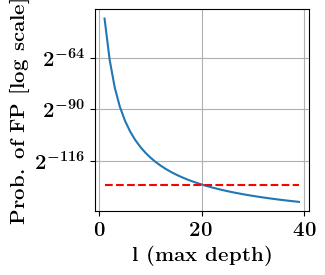

In [20]:
# 128-bit security
from math import log, e, ceil

n = 2 ** 19

print(vs[20-1])
m = - n * (log(2 ** (-128), e)) / (log(2, e) ** 2) * vs[20 - 1] / 2
print("m", m, ceil(m), log(m, 2))

m = ceil(m)

print(vals[20 - 1])
print(vals[1 - 1])
print(Ts[20 - 1])

k = 2 * Ts[20 - 1] * m / n

print("k", k, int(k))

k = round(k)

xs = []
ys = []
for depth in range(1, 40):
    xs.append(depth)
    prob = 1
    e2 = 1

    beta = []
    T = Ts[depth - 1]
    k = int(T * 2 * m / n)

    maxDepth = depth
    beta = print_beta_i(R200(T))

    for d in range(0, depth):
        exponent = sum([beta[i] for i in range(d, depth)]) * k * (n / 2) / m
        prob *= pow(1 - e ** (-exponent), beta[d] * k)
        e2 += e ** (-exponent)
    ys.append(prob)

print(min(ys))
plt.figure(figsize=figsize)
plt.xlabel(r'\textbf{l (max depth)}')
plt.ylabel(r'\textbf{Prob. of FP [log scale]}')
plt.grid(True)
plt.yscale('log', base=2)
plt.plot(xs, ys)
plt.plot(xs, [2** -128 for _ in xs], color='red', linestyle='dashed')
print(log(10** -50, 2))


In [21]:
# expected value of d
exp = 0
for d in range(1, 21):
    exp += beta[d - 1] * d

print(exp)

4.17864493759305687


In [22]:
from math import ceil

n = 2 ** 19

k = 1024
m = 2 ** 29

m_prim = - n * (log(2 ** (-256), e)) / (log(2, e) ** 2) * vs[20 - 1] / 2
m_prim = ceil(m_prim)

k_prim = 2 * Ts[20 - 1] * m_prim / n

print("k_prim", k_prim, int(k_prim))
print("m_prim", m_prim)

d_bar = exp
l = 20
keysize= 512

sign = ceil(k/keysize) + k
sign_plus = ceil(k_prim/keysize) + k_prim * (1 + l - d_bar)

keygen = 2*m
keygen_plus = 2*m_prim*l

verify = ceil(k/keysize) + 2*k
verify_plus = ceil(k_prim/keysize) + k_prim * (1 + d_bar)

print("Keygen overhead", keygen_plus/keygen)
print("Sign overhead", sign_plus/sign)
print("Verify overhead", verify_plus/verify)


k_prim 505.34303124036035 505
m_prim 33251342
Keygen overhead 1.2387090176343918
Sign overhead 8.286115552443574
Verify overhead 1.2770693319418644
